# Análisis exploratorio Dataset 2 CMP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

A continuación se muestra la información con respecto a cada variable del dataset

In [2]:
df = pd.read_excel('dataframe.xlsx', sheet_name='Hoja1')
df.head()

,ID,shiftdate,shiftindex,shift#,start,crew#,crew,eqmtid,logintime,locid,...,tmcat10,tmcat11,tmcat12,tmcat13,tmcat14,tmcat15,tmcat16,tmcat17,tmcat18,tmcat19
0,1,2019-07-01,36157,2,28800,4,G2,428,36957,,...,0,0,0,0,0,0,0,0,0,0
1,2,2019-07-01,36157,2,28800,4,G2,429,0,,...,0,0,0,0,0,0,0,0,0,0
2,3,2019-07-01,36157,2,28800,4,G2,429,3110,,...,0,0,0,0,0,0,0,0,0,0
3,4,2019-07-01,36157,2,28800,4,G2,430,0,,...,0,0,0,0,0,0,0,0,0,0
4,5,2019-07-01,36157,2,28800,4,G2,430,2776,,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print('Cantidad de Filas y columnas:',df.shape)

Cantidad de Filas y columnas: (120441, 41)


Después de haber revisado el dataset nos percatamos de la existencia de varias columnas que poseían solamente valores cero por lo que fueron borradas del dataset.

In [4]:
df.drop(columns=['tmcat08', 'tmcat09', 'tmcat10',
       'tmcat11', 'tmcat12', 'tmcat13', 'tmcat14', 'tmcat15', 'tmcat16',
       'tmcat17', 'tmcat18', 'tmcat19'],inplace=True)

In [5]:
print('Cantidad de Filas y columnas:',df.shape)

Cantidad de Filas y columnas: (120441, 29)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120441 entries, 0 to 120440
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ID          120441 non-null  int64         
 1   shiftdate   120441 non-null  datetime64[ns]
 2   shiftindex  120441 non-null  int64         
 3   shift#      120441 non-null  int64         
 4   start       120441 non-null  int64         
 5   crew#       120441 non-null  int64         
 6   crew        120441 non-null  object        
 7   eqmtid      120441 non-null  object        
 8   logintime   120441 non-null  int64         
 9   locid       120441 non-null  object        
 10  operid      120441 non-null  object        
 11  totaltime   120441 non-null  int64         
 12  pit         120441 non-null  object        
 13  unit#       120441 non-null  int64         
 14  unit        120441 non-null  object        
 15  totalloads  120441 non-null  int64         
 16  to

In [7]:
df = df.rename(columns={'shiftdate':'Fecha_carga'})
df = df.rename(columns={'shiftindex':'indice_turno'})
df = df.rename(columns={'shift#':'turno'})
df = df.rename(columns={'start':'inicio_turno'})
df = df.rename(columns={'crew#':'id_grupo'})
df = df.rename(columns={'crew':'nom_grupo'})
df = df.rename(columns={'eqmtid':'id_equipo_operado'})
df = df.rename(columns={'logintime':'inicio_loginop'})
df = df.rename(columns={'locid':'lugar_operacion'})
df = df.rename(columns={'operid':'id_operador'})
df = df.rename(columns={'totaltime':'duracion_login'})
df = df.rename(columns={'pit':'area_mina'})
df = df.rename(columns={'unit#':'id_tipoeq'})
df = df.rename(columns={'unit':'glosa_tipoeq'})
df = df.rename(columns={'unit#':'id_tipoeq'})
df = df.rename(columns={'totalloads':'total_cargas'})
df = df.rename(columns={'totaltons':'total_tons'})
df = df.rename(columns={'loadtime':'ttotal_cargas'})
df = df.rename(columns={'idletime':'ttotal_espera'})
df = df.rename(columns={'spottime':'ttotal_aculatamiento'})
df = df.rename(columns={'loadcnt':'contador_cargas'})
df = df.rename(columns={'tmcat00':''})
df = df.rename(columns={'tmcat01':'t_efectivo'})
df = df.rename(columns={'tmcat02':'t_noproductivo'})
df = df.rename(columns={'tmcat03':'t_demoraoperacional'})
df = df.rename(columns={'tmcat04':'t_reserva'})
df = df.rename(columns={'tmcat05':'t_mantencionNP'})
df = df.rename(columns={'tmcat06':'t_inhabil'})
df = df.rename(columns={'tmcat07':'t_mantencionP'})

In [8]:
df.columns

Index(['ID', 'Fecha_carga', 'indice_turno', 'turno', 'inicio_turno',
       'id_grupo', 'nom_grupo', 'id_equipo_operado', 'inicio_loginop',
       'lugar_operacion', 'id_operador', 'duracion_login', 'area_mina',
       'id_tipoeq', 'glosa_tipoeq', 'total_cargas', 'total_tons',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       'contador_cargas', '', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP'],
      dtype='object')

# Análisis variables producción

En esta sección solo analizaremos el comportamiento de 3 variables asociadas a las cargas totales, las toneladas totales y el contador de cargas

In [9]:
var_prod=df[['total_cargas', 'total_tons','contador_cargas']]
var_prod.head()

,total_cargas,total_tons,contador_cargas
0,3,688.00000,3
1,1,230.00000,1
2,19,4353.30078,19
3,0,0.00000,0
4,19,4406.89990,19


In [10]:
var_prod=df[['total_cargas', 'total_tons','contador_cargas']]
var_prod.corr()

,total_cargas,total_tons,contador_cargas
total_cargas,1.000000,0.999415,1.000000
total_tons,0.999415,1.000000,0.999415
contador_cargas,1.000000,0.999415,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

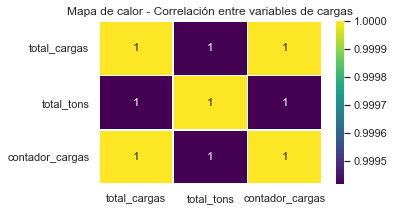

In [11]:
plt.rcParams['figure.figsize']=(5,3)

heat_map1 = sns.heatmap(var_prod.corr(),linewidths=.7,annot=True,cmap="viridis")
heat_map1.set_title('Mapa de calor - Correlación entre variables de cargas')
plt.show

Si sólo analizamos aquellas variables asociadas a carga de mineral (las cuales son 3) hay un alto nivel de correlación entre todas, con valores 1 o 0.99
De forma marginal, el total de cargas esta menos correlacionado con las toneladas totales.

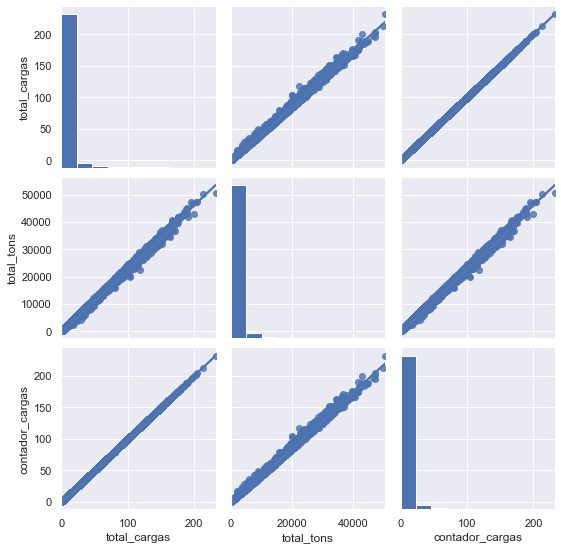

In [12]:
g = sns.pairplot(var_prod,kind='reg')

Hay una clara tendencia lineal entre las variables de producción, con una pendiente marcadamente positiva. Esto es bastante predecible debido a que a mayor cantidad de cargas mayor debiesen ser las toneladas totales.

In [13]:
var_prod.describe()

,total_cargas,total_tons,contador_cargas
count,120441.000000,120441.000000,120441.000000
mean,4.485250,1033.797299,4.485250
std,13.284128,3063.018601,13.284128
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,232.000000,50616.609380,232.000000


Al obtener las estadísticas descriptivas de las variables asociadas a producción, notamos una distribución extraña de los datos ya que tanto el 25%, 50% y 75% de las variables son iguales a 0 en todas las variables.

In [14]:
print("Moda total_cargas =",var_prod['total_cargas'].mode())
print("Moda total_tons =",var_prod['total_tons'].mode())
print("Moda contador_cargas =",var_prod['contador_cargas'].mode())

Moda total_cargas = 0    0
dtype: int64
Moda total_tons = 0    0.0
dtype: float64
Moda contador_cargas = 0    0
dtype: int64


En base a las estadísticas descriptivas, se sacó la moda para ver el valor mas repetido en estas variables dando como resultado el valor 0, lo cuál puede explicar el comportamiento de las estadísticas descriptivas analizadas previamente.

# Histogramas Variables Cargas

Text(0.5, 1.0, 'Histograma Toneladas totales (con ceros)')

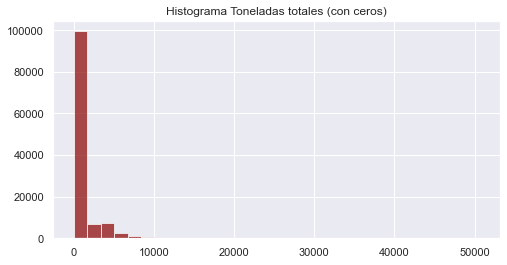

In [15]:
ax=var_prod['total_tons'].hist(bins=30,color='darkred',alpha=0.7,figsize=(8,4))
ax.set_title('Histograma Toneladas totales (con ceros)')

El grafico corrobora el hecho de que una gran parte de los datos pertenecientes a variables de producción tienen valores 0. Debido a esto y como influyen los ceros en los datos, para ver el comportamiento de las toneladas totales, se utilizaran solamente los datos mayores a cero.

Text(0.5, 0, 'Toneladas totales (tons)')

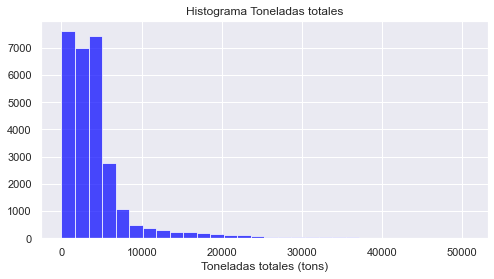

In [16]:
var_prod=var_prod[var_prod.total_tons!=0]
var_prod['total_tons'].head()
ax=var_prod['total_tons'].hist(bins=30,color='blue',alpha=0.7,figsize=(8,4))
ax.set_title('Histograma Toneladas totales')
#ax.set_ylabel('hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
ax.set_xlabel('Toneladas totales (tons)')

Text(0.5, 0, 'Cargas totales (vueltas de camión)')

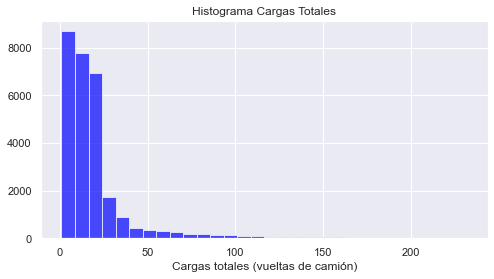

In [17]:
var_prod=var_prod[var_prod.total_cargas!=0]
var_prod['total_cargas'].head()
ax=var_prod['total_cargas'].hist(bins=30,color='blue',alpha=0.7,figsize=(8,4))
ax.set_title('Histograma Cargas Totales')
ax.set_xlabel('Cargas totales (vueltas de camión)')

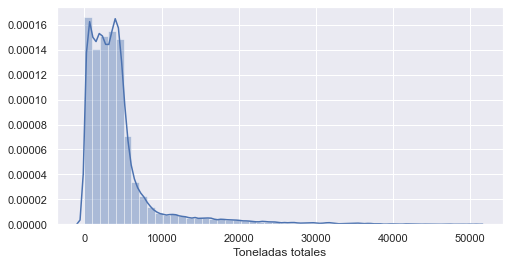

In [18]:
from seaborn import distplot
plt.rcParams['figure.figsize']=(8,4)
distplot(var_prod['total_tons'],axlabel='Toneladas totales')

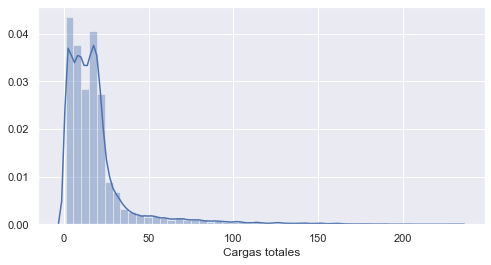

In [19]:
from seaborn import distplot
plt.rcParams['figure.figsize']=(8,4)
distplot(var_prod['total_cargas'],axlabel='Cargas totales')

In [20]:
var_prod.describe()

,total_cargas,total_tons,contador_cargas
count,28557.000000,28557.000000,28557.000000
mean,18.916833,4360.107171,18.916833
std,21.708891,5006.698032,21.708891
min,1.000000,0.600000,1.000000
25%,7.000000,1615.199950,7.000000
50%,14.000000,3290.199950,14.000000
75%,21.000000,4870.500000,21.000000
max,232.000000,50616.609380,232.000000


Text(0, 0.5, 'Toneladas totales')

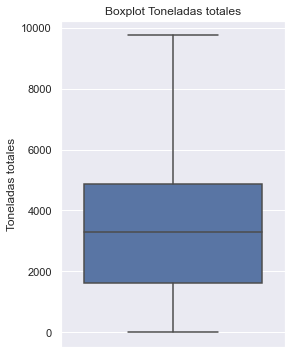

In [21]:
plt.rcParams['figure.figsize']=(4,6)
ax=sns.boxplot(y=var_prod['total_tons'],data=var_prod,showfliers = False, orient="v" )
ax.set_title('Boxplot Toneladas totales')
ax.set_ylabel('Toneladas totales')

Text(0, 0.5, 'Cargas totales (vueltas de camión)')

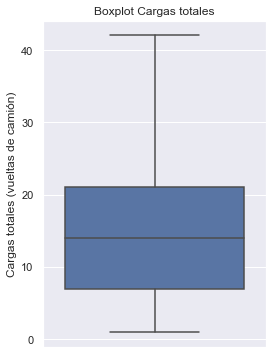

In [22]:
plt.rcParams['figure.figsize']=(4,6)
ax=sns.boxplot(y=var_prod['total_cargas'],data=var_prod,showfliers = False, orient="v" )
ax.set_title('Boxplot Cargas totales')
ax.set_ylabel('Cargas totales (vueltas de camión)')

# Análisis Variables de Tiempo

En este apartado solamente se revisarán las variables asociadas a tiempos, correspondientes a 13 variables dentro del dataset.

In [23]:
var_tpo=df[['inicio_turno','inicio_loginop', 'duracion_login',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP']]
var_tpo.corr()

,inicio_turno,inicio_loginop,duracion_login,ttotal_cargas,ttotal_espera,ttotal_aculatamiento,t_efectivo,t_noproductivo,t_demoraoperacional,t_reserva,t_mantencionNP,t_inhabil,t_mantencionP
inicio_turno,1.000000,0.053665,-0.031080,-0.018424,0.078368,-0.016638,-0.004732,0.003934,0.034993,-0.013233,-0.004111,-0.037148,0.003990
inicio_loginop,0.053665,1.000000,-0.358142,-0.001847,-0.041207,-0.006432,-0.072906,-0.001016,-0.057602,-0.147549,-0.155068,-0.147359,-0.046186
duracion_login,-0.031080,-0.358142,1.000000,0.157350,0.167809,0.142623,0.393282,0.003297,0.094251,0.348574,0.381152,0.328295,0.128244
ttotal_cargas,-0.018424,-0.001847,0.157350,1.000000,0.305387,0.796102,0.484649,0.005723,0.125194,-0.077408,-0.141353,-0.035480,-0.050810
ttotal_espera,0.078368,-0.041207,0.167809,0.305387,1.000000,0.281389,0.371321,0.003471,0.236900,-0.055827,-0.096358,0.012218,-0.032300
ttotal_aculatamiento,-0.016638,-0.006432,0.142623,0.796102,0.281389,1.000000,0.433777,0.010362,0.133025,-0.073231,-0.125406,-0.029117,-0.044948
t_efectivo,-0.004732,-0.072906,0.393282,0.484649,0.371321,0.433777,1.000000,0.003502,0.269356,-0.138950,-0.233272,-0.063174,-0.083596
t_noproductivo,0.003934,-0.001016,0.003297,0.005723,0.003471,0.010362,0.003502,1.000000,0.004364,-0.001512,-0.000266,-0.000724,-0.000920
t_demoraoperacional,0.034993,-0.057602,0.094251,0.125194,0.236900,0.133025,0.269356,0.004364,1.000000,-0.084925,-0.136092,-0.025277,-0.042529
t_reserva,-0.013233,-0.147549,0.348574,-0.077408,-0.055827,-0.073231,-0.138950,-0.001512,-0.084925,1.000000,-0.148717,-0.113877,-0.048715


<function matplotlib.pyplot.show(*args, **kw)>

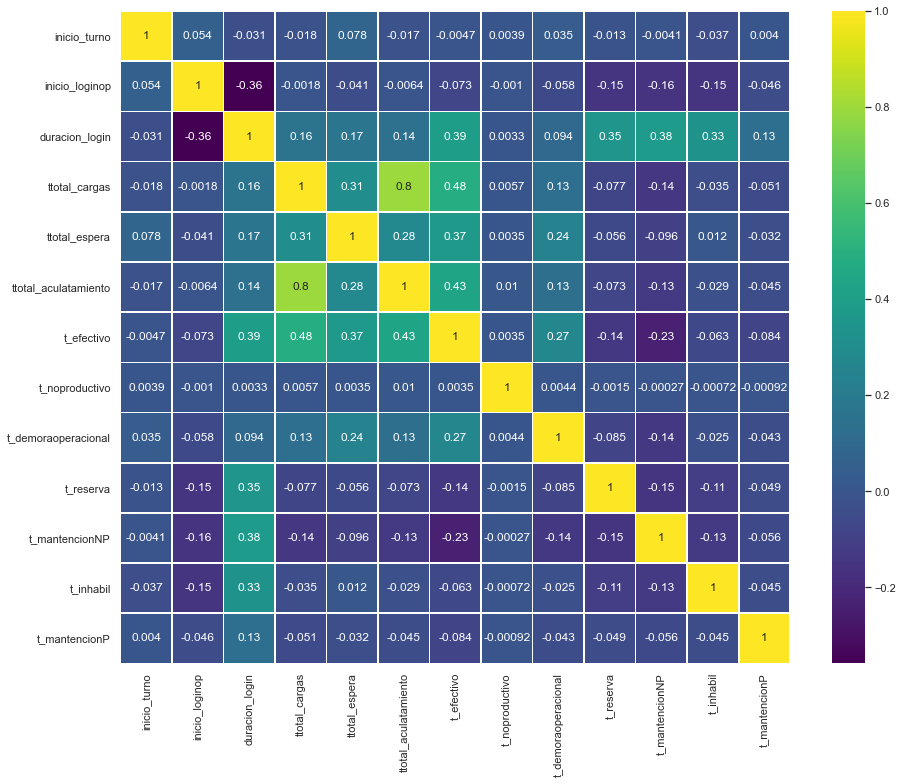

In [24]:
plt.rcParams['figure.figsize']=(15,12)
heat_map1 = sns.heatmap(var_tpo.corr(),linewidths=.7,annot=True,cmap="viridis")
plt.show

Luego separamos las variables asociadas a tiempos, y hicimos el mismo ejercicio de sacar la correlación.
En donde la variable asociada al tiempo total de aculatamiento esta muy correlacionada con el tiempo total de carga con un valor de 0,796102.
Otra variable interesante es la de tiempo efectivo (t_efectivo) ya que presenta un nivel de correlación relativamente alto con las variables:
- duracion_login (0,393282 )
- ttotal_cargas (0,484649 )
- ttotal_espera (0,371321 )
- ttotal_aculatamiento (0,433777 )

Al igual que la variable asociada a la duración de la sesión (duracion_login) la cual esta marginalmente correlacionada de forma positiva con:
- t_reserva (0,35)
- t_mantencionNP (0,38)
- t_inhabil (0,33)

Puede que la existencia de estas correlaciones se deba al proceso mismo de carguío, ya que el tiempo efectivo es definido como el **tiempo en que el equipo está desarrollando sin inconvenientes la labor programada** por lo que puede incluir el tiempo total de carga, el tiempo de espera que debe tener el camión mientras esta siendo cargado y el tiempo de aculatamiento el cual seria el tiempo que toma el camión en ponerse en posicion para recibir el material.

Lo mismo puede establecerse con respecto a la variable duración login ya que la duración del ingreso del usuario se va a ver aumentada en caso de una mantencion programada, en caso de que la faena suspenda sus actividades productivas/mantencion de equipos en caso de imprevistos o paralizaciones programadas o considerando el tiempo de reserva entendiendose como **el tiempo en que el equipo,estando en condiciones de realizar la labor productiva, no es utilizado, ya sea porque no hay un operador disponible, o bien,simplemente porque no se ha considerado su operación en los programas de producción para el período actual.** o en caso de una mantencion no programada.

Definiciones
- Espera de Camión: Es el tiempo que la pala debe esperar hasta que un camión llegue a la zona de carga e inicie el aculatamiento.
- Espera de Aculatamiento: Es el tiempo donde el camión inicia la maniobra para tomar la ubicación adecuada al costado de la pala para ser cargado.


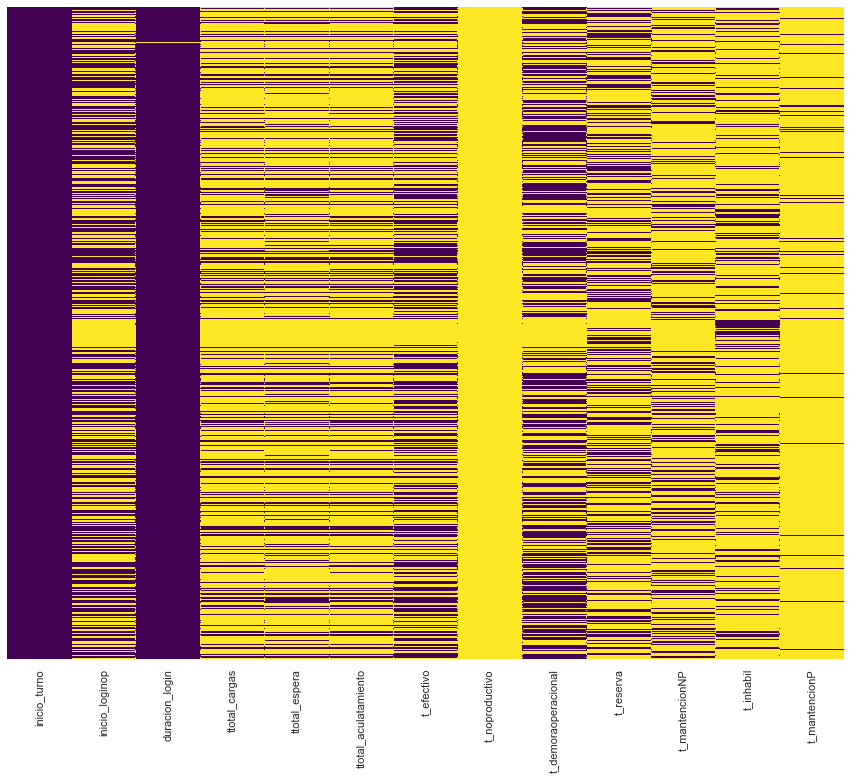

In [25]:
sns.heatmap(var_tpo==0,yticklabels=False,cbar=False,cmap='viridis')

(tiempo no productivo) ¿Por que si es que hay muchos datos con valor cero en lo que respecta a cargas, la columna de tiempo no productivo esta en cero? ¿Estan relacionadas de alguna forma?

***TIEMPO DEMORA OPERACIONAL:***

**Tiempo de perdida operacionales (TPO)**: Son las horas en que el equipo estando en condiciones mecánicas de cumplir su objetivo de diseño y con tarea asignada, no puede realizarla por motivos ajenos a su funcionamiento generalmente por razones de coordinación, este tiempo se divide:

- **Demoras operacionales programadas (TDP)**:Son las horas en que el equipo está detenido (con motor detenido) por tareas programadas: espera y/o cambio de operador(es) ya sea por entrada o salida de turno y colación.
- **Demoras operacionales NO programadas (TDNP)**: Son las horas en que el equipo está detenido (con motor funcionando) por tareas no programadas: despeje por tronadura, traslado de equipos, abastecimiento de combustible o agua, charlas de seguridad o instrucciones, detenciones varias.

Hipotesis: La gran cantidad de variables productivas con valor cero puede deberse a que el camión no hubiese estado disponible ya sea por mantencion no programada, por paralización de la faena o por falta de un operador.

Si esto es asi, los tiempos de no productividad, inhabilitacion, mantencion NP y otros, debiesen ser distintos de cero en aquellos casos en que las cargas sean cero. En al menos 1 de estos items.

In [26]:
var_tpo.columns

Index(['inicio_turno', 'inicio_loginop', 'duracion_login', 'ttotal_cargas',
       'ttotal_espera', 'ttotal_aculatamiento', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP'],
      dtype='object')

Text(0.5, 1.0, 'Histograma Tiempo efectivo')

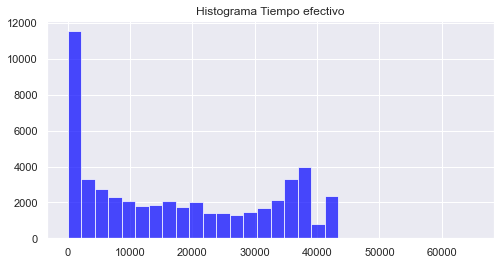

In [27]:
var_tpo1=var_tpo[var_tpo.t_efectivo!=0]
var_tpo1['t_efectivo'].head()
ax=var_tpo1['t_efectivo'].hist(bins=30,color='blue',alpha=0.7,figsize=(8,4))
ax.set_title('Histograma Tiempo efectivo')
#ax.set_ylabel('hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
#ax.set_xlabel('Toneladas totales (tons)')

Text(0.5, 1.0, 'Histograma Tiempo total cargas')

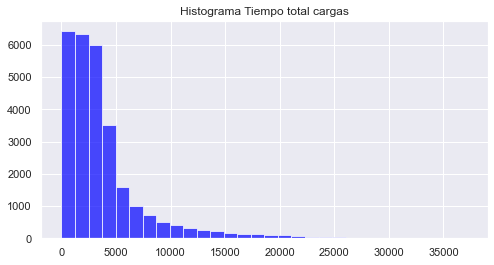

In [28]:
var_tpo2=var_tpo[var_tpo.ttotal_cargas!=0]
var_tpo2['ttotal_cargas'].head()
ax=var_tpo2['ttotal_cargas'].hist(bins=30,color='blue',alpha=0.7,figsize=(8,4))
ax.set_title('Histograma Tiempo total cargas')
#ax.set_ylabel('hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
#ax.set_xlabel('Toneladas totales (tons)')

Text(0.5, 1.0, 'Histograma Inicio_turno')

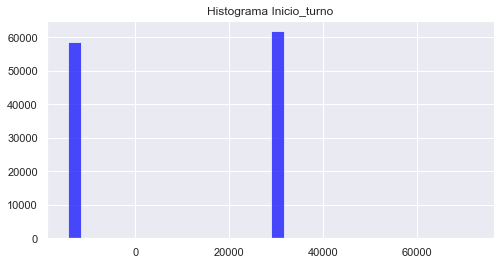

In [29]:
var_tpo3=var_tpo[var_tpo.inicio_turno!=0]
var_tpo3['inicio_turno'].head()
ax=var_tpo3['inicio_turno'].hist(bins=30,color='blue',alpha=0.7,figsize=(8,4))
ax.set_title('Histograma Inicio_turno')
#ax.set_ylabel('hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
#ax.set_xlabel('Toneladas totales (tons)')

Text(0.5, 1.0, 'Histograma Inicio Login Operador')

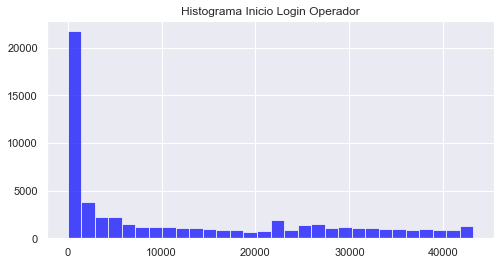

In [30]:
var_tpo4=var_tpo[var_tpo.inicio_loginop!=0]
var_tpo4['inicio_loginop'].head()
ax=var_tpo4['inicio_loginop'].hist(bins=30,color='blue',alpha=0.7,figsize=(8,4))
ax.set_title('Histograma Inicio Login Operador')
#ax.set_ylabel('hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
#ax.set_xlabel('Toneladas totales (tons)')

Text(0.5, 1.0, 'Histograma Duración Login')

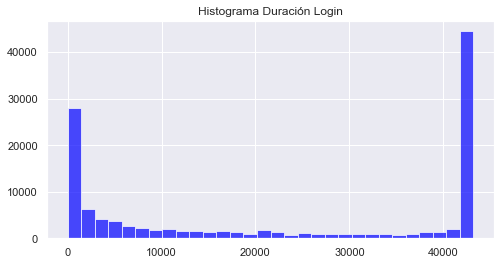

In [31]:
var_tpo5=var_tpo[var_tpo.duracion_login!=0]
ax=var_tpo5['duracion_login'].hist(bins=30,color='blue',alpha=0.7,figsize=(8,4))
ax.set_title('Histograma Duración Login')
#ax.set_ylabel('hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
#ax.set_xlabel('Toneladas totales (tons)')

In [32]:
var_tpo.describe()

,inicio_turno,inicio_loginop,duracion_login,ttotal_cargas,ttotal_espera,ttotal_aculatamiento,t_efectivo,t_noproductivo,t_demoraoperacional,t_reserva,t_mantencionNP,t_inhabil,t_mantencionP
count,120441.000000,120441.000000,120441.000000,120441.000000,120441.000000,120441.000000,120441.000000,120441.000000,120441.000000,120441.000000,120441.000000,120441.000000,120441.000000
mean,7868.762299,5901.012986,22390.472240,898.468047,845.575161,251.123803,7435.845551,0.269335,575.538795,4661.962596,5604.838053,3322.964771,789.629213
std,21705.692037,11268.727464,18632.824061,2565.560032,3430.847047,806.119602,12826.270505,43.250893,1662.673482,11888.209155,13694.352722,10303.122067,5340.785599
min,-14400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-14400.000000,0.000000,1794.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28800.000000,0.000000,20917.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28800.000000,4377.000000,43200.000000,0.000000,0.000000,0.000000,10041.000000,0.000000,583.000000,762.000000,10.000000,0.000000,0.000000
max,72000.000000,43199.000000,43200.000000,37191.000000,43200.000000,65532.000000,65079.000000,10796.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000


In [33]:
var_tpo.columns

Index(['inicio_turno', 'inicio_loginop', 'duracion_login', 'ttotal_cargas',
       'ttotal_espera', 'ttotal_aculatamiento', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP'],
      dtype='object')

In [34]:
pplot=var_tpo[['t_efectivo', 'ttotal_cargas',
       'ttotal_espera']]

#'duracion_login', 'ttotal_cargas',
#       'ttotal_espera', 'ttotal_aculatamiento', 't_efectivo', 't_noproductivo',
#       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
#       't_mantencionP'

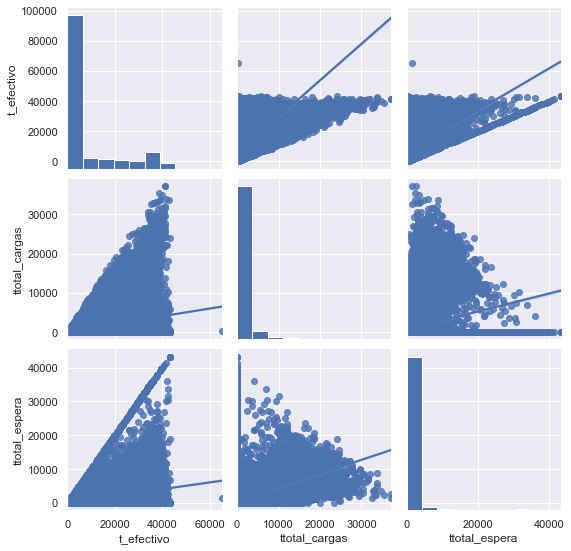

In [35]:
g = sns.pairplot(pplot,kind='reg')

# Análisis variables identificadoras

In [36]:
var_id=df[['ID', 'Fecha_carga', 'indice_turno', 'turno',
       'id_grupo', 'nom_grupo', 'id_equipo_operado', 
       'lugar_operacion', 'id_operador', 'area_mina',
       'id_tipoeq', 'glosa_tipoeq']]
var_id.head()

,ID,Fecha_carga,indice_turno,turno,id_grupo,nom_grupo,id_equipo_operado,lugar_operacion,id_operador,area_mina,id_tipoeq,glosa_tipoeq
0,1,2019-07-01,36157,2,4,G2,428,,05981,MINA,1,Camion
1,2,2019-07-01,36157,2,4,G2,429,,mmsunk,MINA,1,Camion
2,3,2019-07-01,36157,2,4,G2,429,,07885,MINA,1,Camion
3,4,2019-07-01,36157,2,4,G2,430,,mmsunk,MINA,1,Camion
4,5,2019-07-01,36157,2,4,G2,430,,07657,MINA,1,Camion


In [37]:
var_id['indice_turno'].nunique()

870

In [38]:
var_id['id_operador'].nunique()

246

In [39]:
var_id['area_mina'].unique()

array(['MINA', ' ', 'RAMPA CNN', 'RAMPA EL LACO'], dtype=object)

In [40]:
var_id['glosa_tipoeq'].unique()

array(['Camion', 'Pala', 'Perforadora', 'Auxil', 'Tractor', 'Moto',
       'Aljibe'], dtype=object)

# Hipotesis varias

In [41]:
df2 = pd.read_excel('dataframe.xlsx', sheet_name='Hoja1')

In [42]:
df2.drop(columns=['tmcat08', 'tmcat09', 'tmcat10',
       'tmcat11', 'tmcat12', 'tmcat13', 'tmcat14', 'tmcat15', 'tmcat16',
       'tmcat17', 'tmcat18', 'tmcat19'],inplace=True)

In [43]:
df2 = df2.rename(columns={'shiftdate':'Fecha_carga'})
df2 = df2.rename(columns={'shiftindex':'indice_turno'})
df2 = df2.rename(columns={'shift#':'turno'})
df2 = df2.rename(columns={'start':'inicio_turno'})
df2 = df2.rename(columns={'crew#':'id_grupo'})
df2 = df2.rename(columns={'crew':'nom_grupo'})
df2 = df2.rename(columns={'eqmtid':'id_equipo_operado'})
df2 = df2.rename(columns={'logintime':'inicio_loginop'})
df2 = df2.rename(columns={'locid':'lugar_operacion'})
df2 = df2.rename(columns={'operid':'id_operador'})
df2 = df2.rename(columns={'totaltime':'duracion_login'})
df2 = df2.rename(columns={'pit':'area_mina'})
df2 = df2.rename(columns={'unit#':'id_tipoeq'})
df2 = df2.rename(columns={'unit':'glosa_tipoeq'})
df2 = df2.rename(columns={'unit#':'id_tipoeq'})
df2 = df2.rename(columns={'totalloads':'total_cargas'})
df2 = df2.rename(columns={'totaltons':'total_tons'})
df2 = df2.rename(columns={'loadtime':'ttotal_cargas'})
df2 = df2.rename(columns={'idletime':'ttotal_espera'})
df2 = df2.rename(columns={'spottime':'ttotal_aculatamiento'})
df2 = df2.rename(columns={'loadcnt':'contador_cargas'})
df2 = df2.rename(columns={'tmcat00':''})
df2 = df2.rename(columns={'tmcat01':'t_efectivo'})
df2 = df2.rename(columns={'tmcat02':'t_noproductivo'})
df2 = df2.rename(columns={'tmcat03':'t_demoraoperacional'})
df2 = df2.rename(columns={'tmcat04':'t_reserva'})
df2 = df2.rename(columns={'tmcat05':'t_mantencionNP'})
df2 = df2.rename(columns={'tmcat06':'t_inhabil'})
df2 = df2.rename(columns={'tmcat07':'t_mantencionP'})

## Hipotesis 1: Todos los equipos mueven cargas

In [44]:
df2.columns

Index(['ID', 'Fecha_carga', 'indice_turno', 'turno', 'inicio_turno',
       'id_grupo', 'nom_grupo', 'id_equipo_operado', 'inicio_loginop',
       'lugar_operacion', 'id_operador', 'duracion_login', 'area_mina',
       'id_tipoeq', 'glosa_tipoeq', 'total_cargas', 'total_tons',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       'contador_cargas', '', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP'],
      dtype='object')

In [45]:
df2['lugar_operacion'].nunique()

419

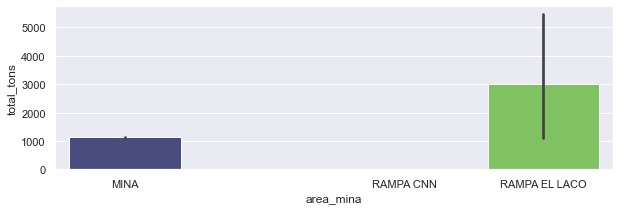

In [46]:
Y = df2['total_tons']
X = df2['area_mina']
plt.rcParams['figure.figsize']=(10,3)
edad_sub=sns.barplot(x=X,y=Y,data=df2,palette='viridis')

Podemos ver de forma inmediata de que no todos los equipos presentes en el dataset presentan cargas asociadas, puede deberse al proceso en sí ya que en los procesos de carguío la perforadora no es utilizada, asi como el camión aljibe. En cuanto a los demas equipos, no se puede inferir que tipo de equipo es en base al nombre, por lo que no sabemos que relacion tienen en el proceso de carguio, solo se puede ver que tampoco tienen toneladas asociadas. En base a esto podemos elugubrar otra hipotesis.

En base a esto, ya que esos equipos no tienen movimientos de cargas asociados, no debiesen tener tiempos asociados al movimiento de cargas.

Text(0.5, 0, 'Tipo de equipo')

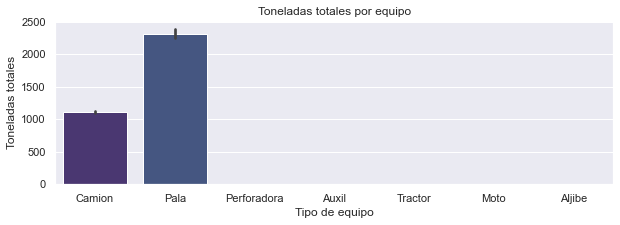

In [47]:
Y = df2['total_tons']
X = df2['glosa_tipoeq']
plt.rcParams['figure.figsize']=(10,3)
edad_sub=sns.barplot(x=X,y=Y,data=df2,palette='viridis')
edad_sub.set_title('Toneladas totales por equipo')
edad_sub.set_ylabel('Toneladas totales')
edad_sub.set_xlabel('Tipo de equipo')

El grafico corrobora nuestra hipotesis de que aquellos equipos que no poseen cargas, no poseen tiempos totales de cargas, pero aun así son parte del dataset por lo que podemos suponer que son parte de algun proceso que puede no medirse en base a cargas o toneladas, por lo que elugubramos otra hipotesis planteando que los equipos que no poseen variables asociadas a cargas estan siendo usados en otro proceso, por lo que tendrian otros tiempos asociados, por lo que probaremos con el tiempo efectivo para comprobar su funcionamiento.

Text(0.5, 0, 'Tipo de equipo')

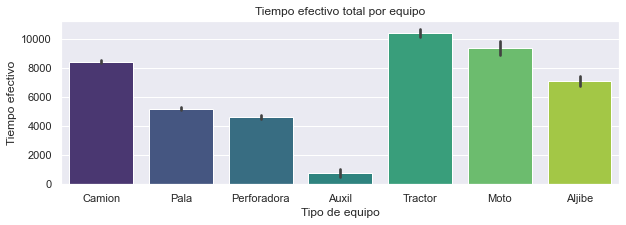

In [48]:
Y = df2['t_efectivo']
X = df2['glosa_tipoeq']
plt.rcParams['figure.figsize']=(10,3)
edad_sub=sns.barplot(x=X,y=Y,data=df2,palette='viridis')
edad_sub.set_title('Tiempo efectivo total por equipo')
edad_sub.set_ylabel('Tiempo efectivo')
edad_sub.set_xlabel('Tipo de equipo')

Asi podemos comprobar de que estos equipos son usados pero no en el proceso de carguío.

Dado que no poseen valores asociados a cargas, decidimos revisar en base al tipo de equipo las diferencias en los tiempos de cada uno.

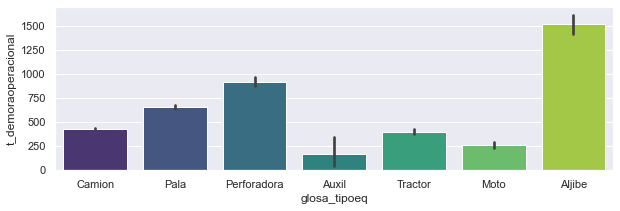

In [49]:
Y = df2['t_demoraoperacional']
X = df2['glosa_tipoeq']
plt.rcParams['figure.figsize']=(10,3)
edad_sub=sns.barplot(x=X,y=Y,data=df2,palette='viridis')

El camión aljibe es el equipo que posee el mayor valor en cuanto a tiempos de demora operacional, osea tiempos en que el equipo esta detenido ya sea por demoras operacionales programadas (cambio operador, entrada o salida de turno, colacion) o no programadas (despeje por tronadura, traslado de equipos, abastecimiento de combustible o agua, charlas de seguridad o instrucciones, detenciones varias). Luego tenemos la perforadora, pala, camion, tractor, moto y por ultimo auxil.

El elevado valor de tiempos de demora operacional del camión aljibe Pueden deberse al poco uso de este equipo en lo que respecta a procesos de carguio teoría que también puede ser aplicada para la perforadora. Debido a que los otros equipos (auxil, tractor y moto) poseen los menores valores en cuanto a tiempo de demora, esto puede implicar de que pasan mucho mas tiempo sin detenciones durante la operacion.

In [50]:
def box_1(i,j):
  Y = df2['t_mantencionNP']
  X = df2['glosa_tipoeq']
  plt.rcParams['figure.figsize']=(i,j)
  sns.barplot(x=X,y=Y,data=df2,palette='viridis')

def box_2(i,j):
  Y = df2['t_mantencionP']
  X = df2['glosa_tipoeq']
  plt.rcParams['figure.figsize']=(i,j)
  sns.barplot(x=X,y=Y,data=df2,palette='viridis')

def box_3(i,j):
  Y = df2['t_reserva']
  X = df2['glosa_tipoeq']
  plt.rcParams['figure.figsize']=(i,j)
  edad_sub=sns.barplot(x=X,y=Y,data=df2,palette='viridis')

def box_4(i,j):
  Y = df2['t_inhabil']
  X = df2['glosa_tipoeq']
  plt.rcParams['figure.figsize']=(i,j)
  edad_sub=sns.barplot(x=X,y=Y,data=df2,palette='viridis')

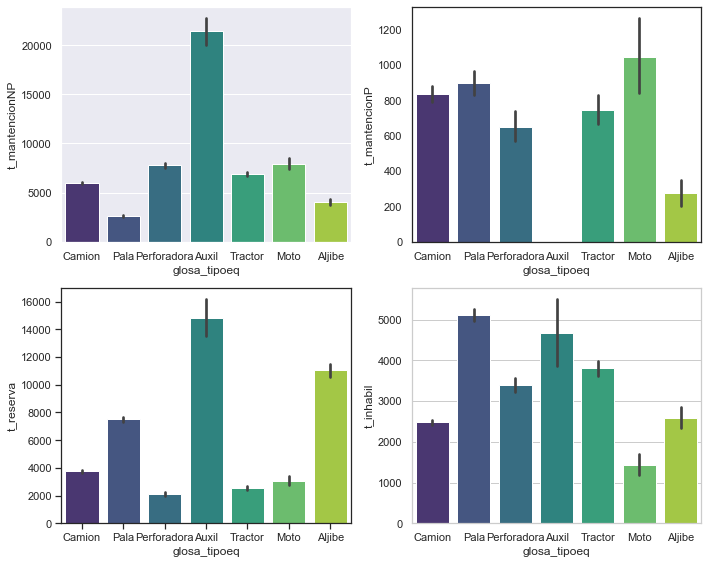

In [51]:
f = plt.figure(figsize=(10, 8))
gs = f.add_gridspec(2, 2)
i=10
j=10

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    box_1(i,j)

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    box_2(i,j)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    box_3(i,j)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    box_4(i,j)

f.tight_layout()

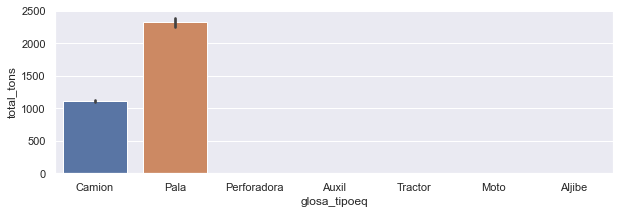

In [52]:
Y = df['total_tons']
X = df['glosa_tipoeq']
plt.rcParams['figure.figsize']=(10,3)
edad_sub=sns.barplot(x=X,y=Y,data=df)

In [53]:
df.columns

Index(['ID', 'Fecha_carga', 'indice_turno', 'turno', 'inicio_turno',
       'id_grupo', 'nom_grupo', 'id_equipo_operado', 'inicio_loginop',
       'lugar_operacion', 'id_operador', 'duracion_login', 'area_mina',
       'id_tipoeq', 'glosa_tipoeq', 'total_cargas', 'total_tons',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       'contador_cargas', '', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP'],
      dtype='object')

In [54]:
df=df[df.total_tons!=0]
df=df[df.t_efectivo!=0]
df.head()

,ID,Fecha_carga,indice_turno,turno,inicio_turno,id_grupo,nom_grupo,id_equipo_operado,inicio_loginop,lugar_operacion,...,ttotal_aculatamiento,contador_cargas,,t_efectivo,t_noproductivo,t_demoraoperacional,t_reserva,t_mantencionNP,t_inhabil,t_mantencionP
0,1,2019-07-01,36157,2,28800,4,G2,428,36957,,...,337,3,6243,5784,0,459,0,0,0,0
2,3,2019-07-01,36157,2,28800,4,G2,429,3110,,...,1334,19,40090,29034,0,450,6264,0,4342,0
4,5,2019-07-01,36157,2,28800,4,G2,430,2776,,...,1744,19,40424,30466,0,1042,4657,0,4259,0
6,7,2019-07-01,36157,2,28800,4,G2,431,8881,,...,1963,17,34319,30117,0,541,351,0,3310,0
10,11,2019-07-01,36157,2,28800,4,G2,432,6032,,...,337,4,7039,6253,0,524,261,1,0,0


In [55]:
df['total_tons'].describe()

count    28186.000000
mean      4403.333136
std       5021.638859
min          0.600000
25%       1642.650088
50%       3323.899900
75%       4893.324828
max      50616.609380
Name: total_tons, dtype: float64

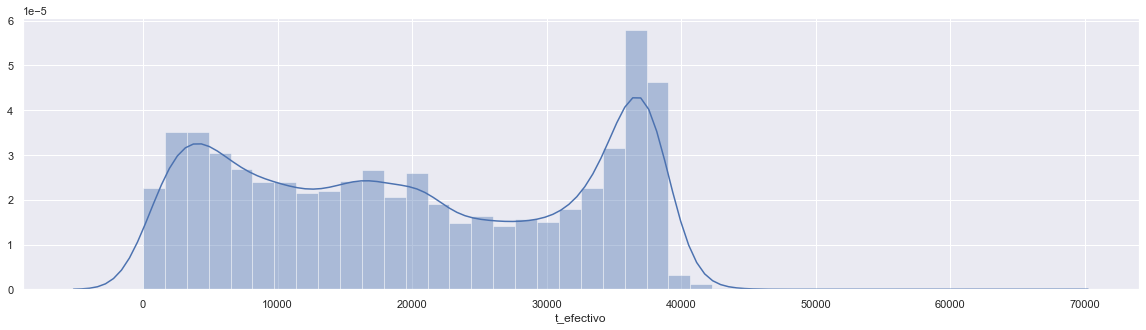

In [56]:
from seaborn import distplot
plt.rcParams['figure.figsize']=(20,5)
distplot(df['t_efectivo'])

Text(0.5, 0, 'Tiempo efectivo')

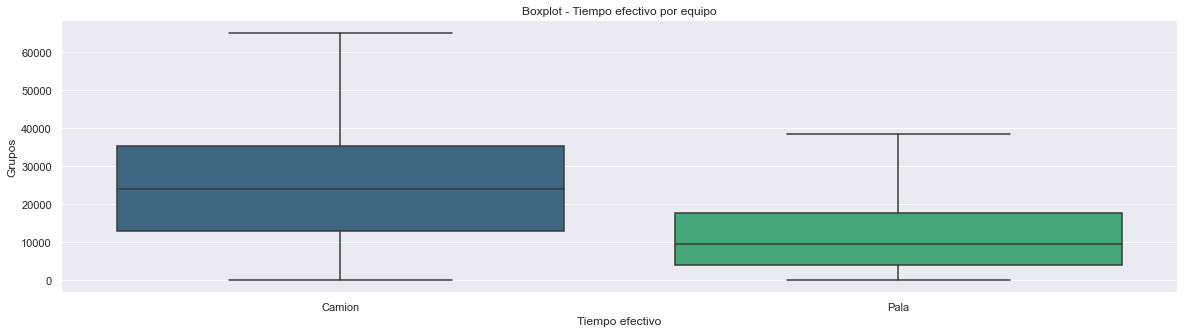

<Figure size 576x216 with 0 Axes>

In [57]:
ax=sns.boxplot(x='glosa_tipoeq',y='t_efectivo',data=df,showfliers = False,palette='viridis')
plt.figure(figsize=(8,3))
ax.set_title('Boxplot - Tiempo efectivo por equipo')
ax.set_ylabel('Grupos')
ax.set_xlabel('Tiempo efectivo')